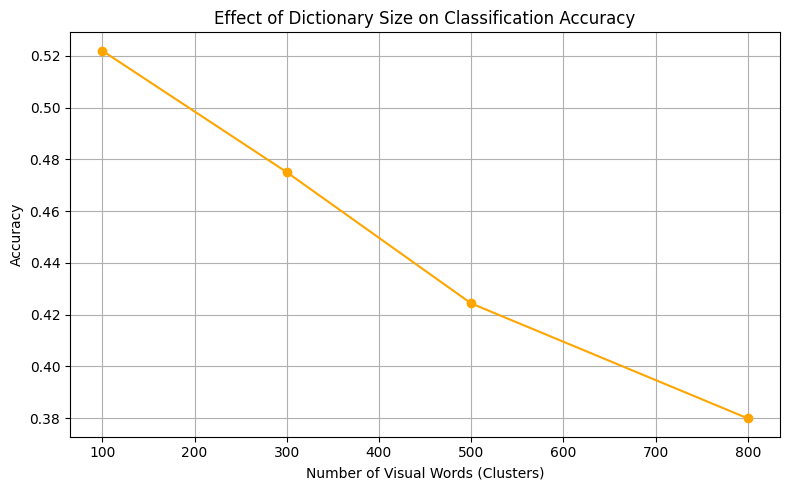

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

clusters_list = [100, 300, 500, 800]
accuracy_results = {}

for k in clusters_list:
    X = np.load(f"bow_histograms_{k}.npy")
    y = np.load(f"bow_labels_{k}.npy")

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    clf = SVC(kernel='rbf', C=10, gamma=0.1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracy_results[k] = acc

plt.figure(figsize=(8, 5))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o', color='orange')
plt.title('Effect of Dictionary Size on Classification Accuracy')
plt.xlabel('Number of Visual Words (Clusters)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.savefig("accuracy_vs_dict_size.png", dpi=300)
plt.show()